# Import

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# RGB zu grayscale umwandeln

In [14]:
def rgb_to_grayscale(image):
    return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

# Histogramm erstellen Funktion

In [15]:
def computeHisto(image):
    histo = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        histo[pixel_value] += 1
    return histo

# Histogram plotten

In [16]:
def plot_histogram(histo, title="Histogram"):
    plt.figure()
    plt.bar(range(256), histo, width=1, color='gray')
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()


# Funktionen anwenden

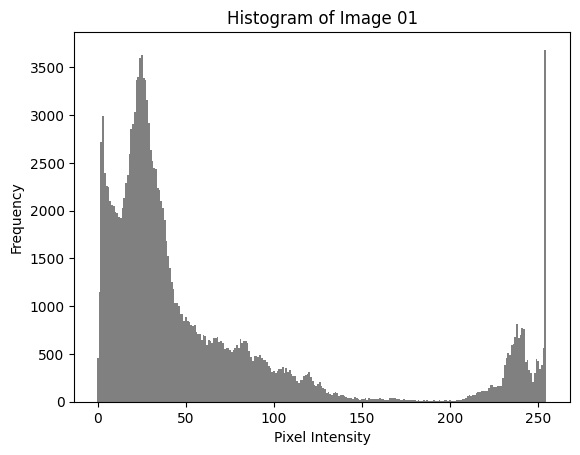

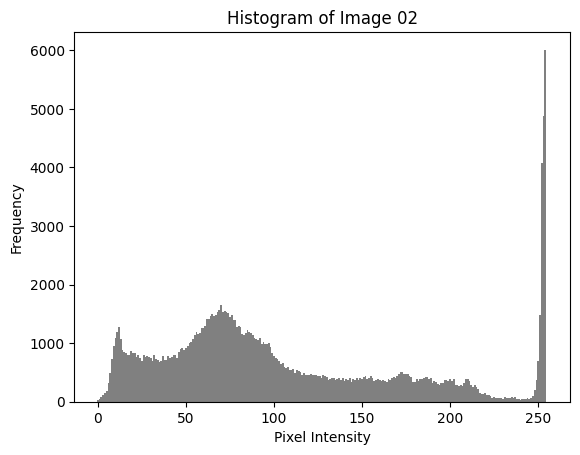

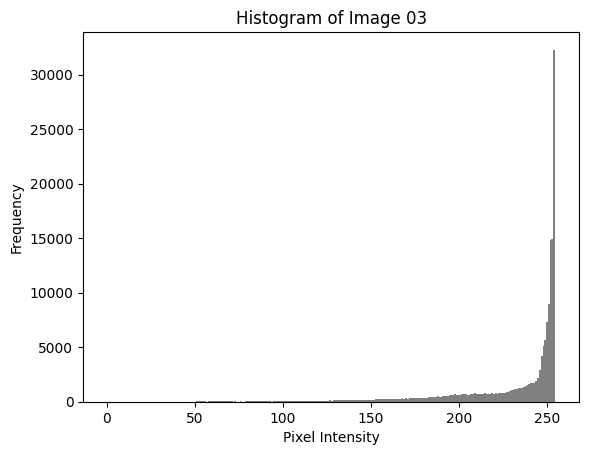

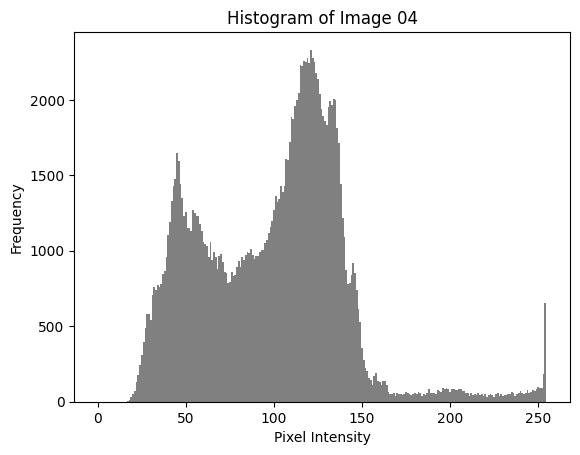

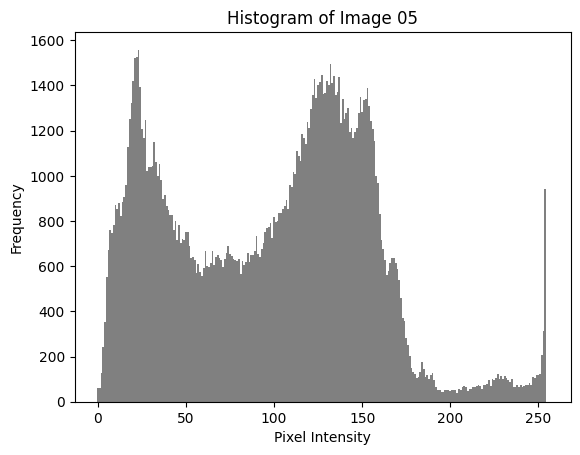

In [18]:

image01 = np.array(Image.open("assets/bild01.jpg"))
image02 = np.array(Image.open("assets/bild02.jpg"))
image03 = np.array(Image.open("assets/bild03.jpg"))
image04 = np.array(Image.open("assets/bild04.jpg"))
image05 = np.array(Image.open("assets/bild05.jpg"))


gray01 = rgb_to_grayscale(image01)
gray02 = rgb_to_grayscale(image02)
gray03 = rgb_to_grayscale(image03)
gray04 = rgb_to_grayscale(image04)
gray05 = rgb_to_grayscale(image05)

histo01 = computeHisto(gray01)
histo02 = computeHisto(gray02)
histo03 = computeHisto(gray03)
histo04 = computeHisto(gray04)
histo05 = computeHisto(gray05)



plot_histogram(histo01, title="Histogram of Image 01")
plot_histogram(histo02, title="Histogram of Image 02")
plot_histogram(histo03, title="Histogram of Image 03")
plot_histogram(histo04, title="Histogram of Image 04")
plot_histogram(histo05, title="Histogram of Image 05")

Implementieren Sie eine Funktion, die eine Punktoperation mithilfe einer Lookup-Tabelle
zum Aufhellen eines Bildes durchf¨uhrt.
a) In Aufgabe (4b) gingen Daten beim Aufhellen eines Bildes verloren. Wie k¨onnte
dies vermieden werden?
b) Damit beim Aufhellen von Bild01 keine Daten verloren gehen, soll eine Lookup-
Tabelle verwendet werden. Versuchen Sie mit der Lookup-Tabelle die dunklen
Bildbereiche des Bildes aufzuhellen ohne die hellen Bereiche zu stark zu ver¨andern.

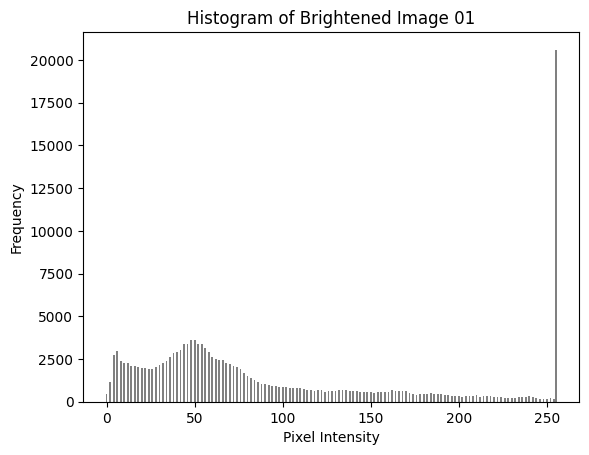

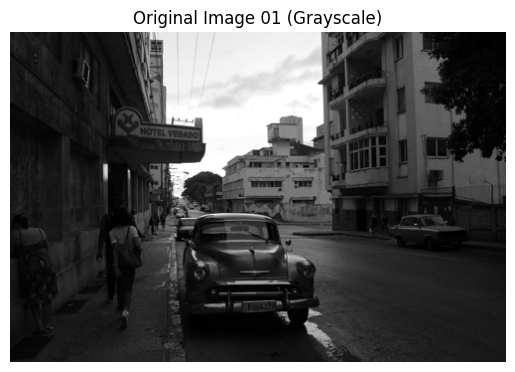

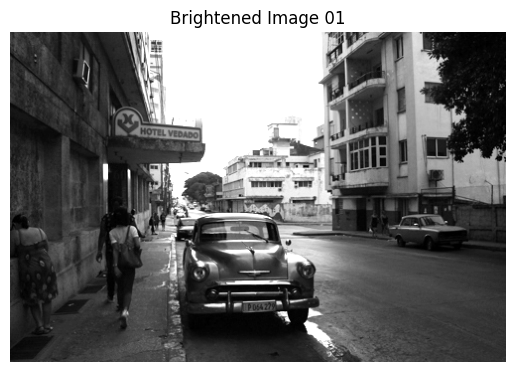

In [21]:


def brighten_with_lookup(image, lookup_table):
    return lookup_table[image]

def create_lookup_table():
    lookup_table = np.arange(256, dtype=np.uint8)
    for i in range(256):
        if i < 128: 
            lookup_table[i] = min(255, int(i * 2.0))
        else: 
            lookup_table[i] = min(255, int(i * 2.0))
    return lookup_table

lookup_table = create_lookup_table()
brightened_image01 = brighten_with_lookup(gray01, lookup_table)

plot_histogram(computeHisto(brightened_image01), title="Histogram of Brightened Image 01")
plt.figure()
plt.imshow(gray01, cmap='gray')
plt.title("Original Image 01 (Grayscale)")
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(brightened_image01, cmap='gray')
plt.title("Brightened Image 01")
plt.axis('off')
plt.show()